In [1]:
#okay... so open each of the files from /gws/nopw/j04/extant/users/slbennie/projection_indicies/NAO/historical
#need to save into one .nc file. Basically just need the indexes which they are so thats good - no bother with the CVDP versions as got so much extra stuff eith them.
#Still only doing djf so thats chill
#preobably rename 'psl' 'NAO_index_DJF'
import xarray as xr
ds = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/projection_indicies/NAO/historical/NorESM2-LM/psl_mon_historical_NorESM2-LM_r10i1p1f1_DJF_NAO_index_norm.nc')
ds

<xarray.Dataset> Size: 3kB
Dimensions:  (year: 165)
Coordinates:
  * year     (year) int64 1kB 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
    season   <U3 12B ...
Data variables:
    psl      (year) float64 1kB ...

In [2]:
#Need .nc file of form model - ensemble member - NAO index for each ensemble member

#Can get list of models from historical file
#loop through list of files
#then find list of ensembles and extract the name
#Then open each ensemble file and add to datastructure.
#save as .nc file


In [27]:
import xarray as xr
import os
import re

# path to the historical directory that holds all the models
home = '/gws/nopw/j04/extant/users/slbennie/projection_indicies/NAO/historical/'

all_datasets = []

# ensemble member id pattern
ens_pattern = re.compile(r"r\d+i\d+p\d+f\d+")

for model in os.listdir(home):
    model_path = os.path.join(home, model)
    if not os.path.isdir(model_path):
        continue

    # skip rogue folder
    if model == "model_ens_means" or model == "era5":
        continue

    for fname in os.listdir(model_path):
        if not fname.endswith(".nc"):
            continue

        # extract ensemble ID
        match = ens_pattern.search(fname)
        if not match:
            continue

        ensemble_id = match.group(0)
        model_ens_id = f"{model}_{ensemble_id}"  # e.g. CanESM5_r1i1p1f1
        file_path = os.path.join(model_path, fname)

        # open dataset and rename
        ds = xr.open_dataset(file_path)
        ds = ds.rename({"psl": "NAO_index_DJF"})
        ds = ds[["NAO_index_DJF"]]
        ds = ds.sel(year=slice(1951,2014))

        # expand along new dimension
        ds = ds.expand_dims({"model_ens": [model_ens_id]})

        all_datasets.append(ds)

# combine into one dataset
historical = xr.concat(all_datasets, dim="model_ens")
historical = historical.drop_vars('season')

# save to NetCDF
historical.to_netcdf("NAO_index_DJF_all_models.nc")

print(historical)


<xarray.Dataset> Size: 206kB
Dimensions:        (model_ens: 396, year: 64)
Coordinates:
  * model_ens      (model_ens) object 3kB 'ACCESS-ESM1-5_r10i1p1f1' ... 'NorE...
  * year           (year) int64 512B 1951 1952 1953 1954 ... 2011 2012 2013 2014
Data variables:
    NAO_index_DJF  (model_ens, year) float64 203kB 0.7789 -0.2211 ... 0.7159


In [28]:
ds = xr.open_dataset('NAO_index_DJF_all_models.nc')
ds

<xarray.Dataset> Size: 243kB
Dimensions:        (model_ens: 396, year: 64)
Coordinates:
  * model_ens      (model_ens) <U25 40kB 'ACCESS-ESM1-5_r10i1p1f1' ... 'NorES...
  * year           (year) int64 512B 1951 1952 1953 1954 ... 2011 2012 2013 2014
Data variables:
    NAO_index_DJF  (model_ens, year) float64 203kB ...

In [29]:
print("Data variables:", list(historical.data_vars))
print("Coordinates:", list(historical.coords))
print("All variables:", list(historical.variables))

# as a NumPy array
ids = historical['model_ens'].values
print(ids)

Data variables: ['NAO_index_DJF']
Coordinates: ['model_ens', 'year']
All variables: ['NAO_index_DJF', 'model_ens', 'year']
['ACCESS-ESM1-5_r10i1p1f1' 'ACCESS-ESM1-5_r11i1p1f1'
 'ACCESS-ESM1-5_r12i1p1f1' 'ACCESS-ESM1-5_r13i1p1f1'
 'ACCESS-ESM1-5_r14i1p1f1' 'ACCESS-ESM1-5_r15i1p1f1'
 'ACCESS-ESM1-5_r16i1p1f1' 'ACCESS-ESM1-5_r17i1p1f1'
 'ACCESS-ESM1-5_r18i1p1f1' 'ACCESS-ESM1-5_r19i1p1f1'
 'ACCESS-ESM1-5_r1i1p1f1' 'ACCESS-ESM1-5_r20i1p1f1'
 'ACCESS-ESM1-5_r21i1p1f1' 'ACCESS-ESM1-5_r22i1p1f1'
 'ACCESS-ESM1-5_r23i1p1f1' 'ACCESS-ESM1-5_r24i1p1f1'
 'ACCESS-ESM1-5_r25i1p1f1' 'ACCESS-ESM1-5_r26i1p1f1'
 'ACCESS-ESM1-5_r27i1p1f1' 'ACCESS-ESM1-5_r28i1p1f1'
 'ACCESS-ESM1-5_r29i1p1f1' 'ACCESS-ESM1-5_r2i1p1f1'
 'ACCESS-ESM1-5_r30i1p1f1' 'ACCESS-ESM1-5_r31i1p1f1'
 'ACCESS-ESM1-5_r32i1p1f1' 'ACCESS-ESM1-5_r33i1p1f1'
 'ACCESS-ESM1-5_r34i1p1f1' 'ACCESS-ESM1-5_r35i1p1f1'
 'ACCESS-ESM1-5_r36i1p1f1' 'ACCESS-ESM1-5_r37i1p1f1'
 'ACCESS-ESM1-5_r38i1p1f1' 'ACCESS-ESM1-5_r39i1p1f1'
 'ACCESS-ESM1-5_r3i1p1f1' 'ACCE

In [34]:
era5 = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/projection_indicies/NAO/historical/era5/ERA5_1.cvdp_data.1940-2014.nc')
era5 = era5['nao_timeseries_djf']
era5 = era5.sel(TIME=slice(1951,2014))

# assume era5 is your DataArray
era5 = era5.rename({"TIME": "year"})
era5.name = "NAO_index_DJF"

# put it into a Dataset
era5_ds = era5.to_dataset()

# expand dims to add "model_ens"
era5_ds = era5_ds.expand_dims(model_ens=["ERA5"])

# concat with your existing historical dataset
combined = xr.concat([historical, era5_ds], dim="model_ens")

# save back to NetCDF
combined.to_netcdf("NAO_index_DJF_all_models_plus_ERA5.nc")

print(combined)


<xarray.Dataset> Size: 207kB
Dimensions:        (model_ens: 397, year: 64)
Coordinates:
  * model_ens      (model_ens) object 3kB 'ACCESS-ESM1-5_r10i1p1f1' ... 'ERA5'
  * year           (year) int64 512B 1951 1952 1953 1954 ... 2011 2012 2013 2014
Data variables:
    NAO_index_DJF  (model_ens, year) float64 203kB 0.7789 -0.2211 ... 0.6744


In [41]:
combined = xr.open_dataset('NAO_index_DJF_all_models_plus_ERA5.nc')
combined

<xarray.Dataset> Size: 243kB
Dimensions:        (model_ens: 397, year: 64)
Coordinates:
  * model_ens      (model_ens) <U25 40kB 'ACCESS-ESM1-5_r10i1p1f1' ... 'ERA5'
  * year           (year) int64 512B 1951 1952 1953 1954 ... 2011 2012 2013 2014
Data variables:
    NAO_index_DJF  (model_ens, year) float64 203kB ...

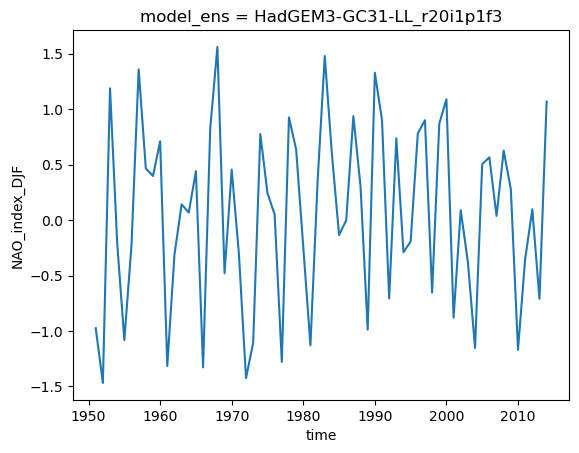

In [42]:
combined.sel(model_ens = 'HadGEM3-GC31-LL_r20i1p1f3')['NAO_index_DJF'].plot()